In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers
import ast  # Library for handling literal_eval
from geopy.distance import geodesic
from sklearn.ensemble import IsolationForest

# Load the dataset
df = pd.read_csv('merged.csv')
df = df.dropna()

# Print the column names to verify
print(df.columns)

# Setup the Isolation Forest
iso_forest = IsolationForest(n_estimators=800, contamination=0.01, random_state=42)
# Fit on the 'duration' column, you may want to reshape it if it's a Series
df['anomaly'] = iso_forest.fit_predict(df[['duration']])

# Filter out the outliers
df = df[df['anomaly'] == 1]  # Keep only normal data points
df.drop(columns='anomaly', inplace=True)  # Clean up by dropping the anomaly column

Index(['Main_Category', 'Longitude', 'Latitude', 'Day', 'duration',
       'Primary_Vehicle', 'Secondary_Vehicle', 'Is_Major_Incident', 'Advice_A',
       'Advice_B', 'Closure_Type', 'Direction', 'Main_Street',
       'Affected_Lanes', 'Actual_Number_of_Lanes ', 'Suburb', 'Traffic_Volume',
       'SA2_CODE21', 'SA3_CODE21', 'SA3_NAME21', 'SA4_CODE21', 'SA4_NAME21',
       'AREASQKM21', '0_ZID', '1_Area', '2_ML', '3_TRL', '4_PRL', '5_SRL',
       '6_TrRL', '7_RRL', '8_LsRL', '9_URL', '10_ToRL', '11_EoR', '12_NoN',
       '13_NDEs', '14_NNC2L', '15_NNC3L', '16_NNC4L', '17_AND', '18_NE',
       '19_MCI', '20_CoI', '21 NBS', '22_CA', '23_EA', '24_HA', '25_IA',
       '26_OA', '27_PA', '28_PrA', '29_RA', '30_TA', '31_WbA', '32_EoLU',
       '33_TP', '34_PD0MV', '35_PD1MV', '36_PD2MV', '37_PD3MV', '38_PD≥4MV',
       '39_PUE', '40_AMI', '41_NPTtWbyPT', '42_NPTtWbyTx', '43_NPTtWbyCD',
       '44_NPTtWbyCP', '45_NPTtWbyO', '46_NPWfH', '47_PWCJH', '48_PBCJH',
       '49_ANP_FH', 'RMS', 'Motorwa

C:\Python3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Script started...
Starting model training and evaluation...
Training model: XGBoost


C:\Python3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Evaluating model: XGBoost
Accuracy for XGBoost: 0.668293278028547, F1 Score: 0.6379494007989347, Training Time: 10.128993511199951, Evaluation Time: 0.032486677169799805
Training model: LightGBM
Evaluating model: LightGBM
Accuracy for LightGBM: 0.6788459192387459, F1 Score: 0.6487892735641384, Training Time: 1.3045477867126465, Evaluation Time: 0.04896807670593262
Training model: Random Forest
Evaluating model: Random Forest
Accuracy for Random Forest: 0.6517628400634379, F1 Score: 0.6169227672280748, Training Time: 5.801520109176636, Evaluation Time: 0.16713690757751465
Training model: Extra Trees
Evaluating model: Extra Trees
Accuracy for Extra Trees: 0.6431621324874954, F1 Score: 0.609113991714553, Training Time: 4.472926616668701, Evaluation Time: 0.1922314167022705
Training model: Decision Tree
Evaluating model: Decision Tree
Accuracy for Decision Tree: 0.5862510674637063, F1 Score: 0.5652201781937055, Training Time: 3.606044054031372, Evaluation Time: 0.016397476196289062
Trainin

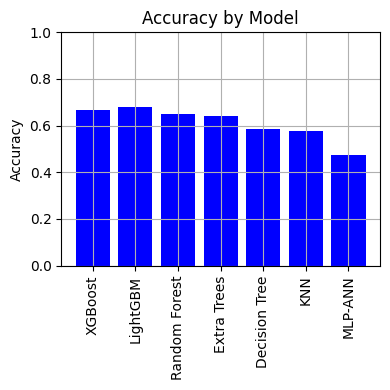

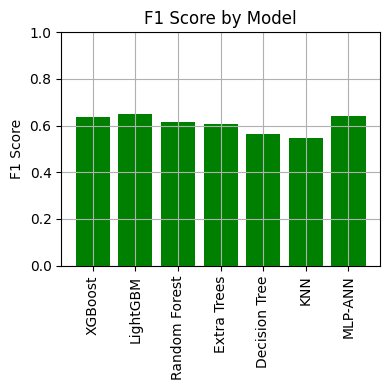

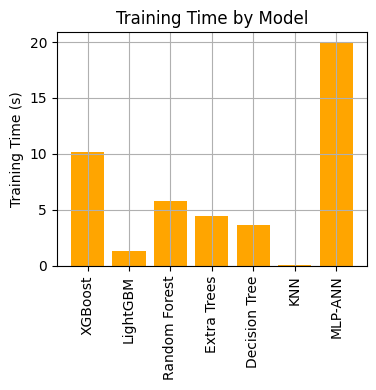

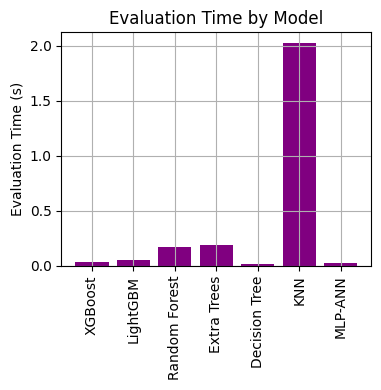

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.svm import SVC  # SVM
from sklearn.neural_network import MLPClassifier  # ANN
import time  # For timing the model training and evaluation

import pandas as pd
import matplotlib.pyplot as plt

def train_models_and_plot(names, models, X_train, X_test, y_train, y_test):
    print("Starting model training and evaluation...")

    performances = []
    training_times = []
    evaluation_times = []
    
    for name, model in zip(names, models):
        print(f"Training model: {name}")
        
        # Measure the training time
        start_train = time.time()
        model.fit(X_train, y_train)
        end_train = time.time()
        train_time = end_train - start_train
        training_times.append(train_time)
        
        print(f"Evaluating model: {name}")
        
        # Measure the evaluation time (prediction time)
        start_eval = time.time()
        y_pred = model.predict(X_test)
        end_eval = time.time()
        eval_time = end_eval - start_eval
        evaluation_times.append(eval_time)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
        print(f"Accuracy for {name}: {accuracy}, F1 Score: {f1}, Training Time: {train_time}, Evaluation Time: {eval_time}")
        
        performances.append((name, accuracy, f1))

    # Create DataFrames for the performance metrics and times
    perf_df = pd.DataFrame(performances, columns=['Model', 'Accuracy', 'F1 Score'])
    time_df = pd.DataFrame({
        'Model': names,
        'Training Time (s)': training_times,
        'Evaluation Time (s)': evaluation_times
    })

    print("Plotting and saving model performance and timing...")

    # Plot for Accuracy
    plt.figure(figsize=(4, 4))
    plt.bar(perf_df['Model'], perf_df['Accuracy'], color='blue')
    plt.title('Accuracy by Model')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.grid(True)  # Enable grid
    plt.xticks(rotation=90)  # Rotate model names for better readability
    plt.tight_layout()
    plt.savefig('accuracy_by_model.pdf')
    print("Saved plot: 'accuracy_by_model.pdf'.")

    # Plot for F1 Score
    plt.figure(figsize=(4, 4))
    plt.bar(perf_df['Model'], perf_df['F1 Score'], color='green')
    plt.title('F1 Score by Model')
    plt.ylabel('F1 Score')
    plt.ylim([0, 1])
    plt.grid(True)  # Enable grid
    plt.xticks(rotation=90)  # Rotate model names for better readability
    plt.tight_layout()
    plt.savefig('f1_score_by_model.pdf')
    print("Saved plot: 'f1_score_by_model.pdf'.")

    # Plot for Training Time
    plt.figure(figsize=(4, 4))
    plt.bar(time_df['Model'], time_df['Training Time (s)'], color='orange')
    plt.title('Training Time by Model')
    plt.ylabel('Training Time (s)')
    plt.grid(True)  # Enable grid
    plt.xticks(rotation=90)  # Rotate model names for better readability
    plt.tight_layout()
    plt.savefig('training_time_by_model.pdf')
    print("Saved plot: 'training_time_by_model.pdf'.")

    # Plot for Evaluation Time
    plt.figure(figsize=(4, 4))
    plt.bar(time_df['Model'], time_df['Evaluation Time (s)'], color='purple')
    plt.title('Evaluation Time by Model')
    plt.ylabel('Evaluation Time (s)')
    plt.grid(True)  # Enable grid
    plt.xticks(rotation=90)  # Rotate model names for better readability
    plt.tight_layout()
    plt.savefig('evaluation_time_by_model.pdf')
    print("Saved plot: 'evaluation_time_by_model.pdf'.")



def main():
    print("Script started...")
    # Example DataFrame creation
    # Placeholder for actual data loading logic
    
    # Assuming df is already defined
    # Convert 'duration' into a binary classification target
    y = (df['duration'] > 30).astype(int)
    X = df.drop(['duration'], axis=1)

    # Take only half of the data for faster training and evaluation
#     X, _, y, _ = train_test_split(X, y, test_size=0.999, random_state=42)

    # Train-test split for half dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model names and instances (added KNN, SVM, and ANN)
    names = [
        "XGBoost", "LightGBM", "Random Forest",
        "Extra Trees", "Decision Tree", "KNN", 
        "MLP-ANN"
    ]
    models = [
        XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='rmse',n_jobs=-1),
        LGBMClassifier(n_estimators=200, random_state=42,n_jobs=-1),
        RandomForestClassifier(n_estimators=200, random_state=42,n_jobs=-1),
        ExtraTreesClassifier(n_estimators=200, random_state=42,n_jobs=-1),
        DecisionTreeClassifier(random_state=42),
        KNeighborsClassifier(n_neighbors=5,n_jobs=-1),  # KNN
#         SVC(kernel='rbf', random_state=42),   # SVM
        MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)  # ANN
    ]
    
    train_models_and_plot(names, models, X_train, X_test, y_train, y_test)
    
    print("Script completed successfully.")

if __name__ == '__main__':
    main()


In [15]:
df

,Main_Category,Longitude,Latitude,Day,duration,Primary_Vehicle,Secondary_Vehicle,Is_Major_Incident,Advice_A,Advice_B,...,Motorway crew,Emergency services,Transport for NSW,Tow truck,Heavy vehicle tow truck,Incident_Type,Num_Vehicles_Involved,Month,Hour,distance_to_CBD
0,1,151.058,-33.9431,5,39.319950,1,2,0,10,0,...,0,1,0,0,0,0,2,8,19,15.781064
1,0,151.159,-33.8096,6,12.029000,1,9,0,10,134,...,0,0,0,0,0,1,1,8,0,8.323913
2,1,150.875,-33.7344,6,16.956667,1,9,0,26,134,...,0,1,0,0,0,0,1,8,1,34.354983
3,1,150.973,-33.8172,6,42.804117,5,2,0,10,0,...,0,1,1,0,0,0,1,8,1,22.500677
4,1,150.981,-33.7919,6,40.840000,3,4,0,10,134,...,0,0,0,0,0,0,3,8,1,22.753003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85606,0,151.193,-33.8877,5,0.073550,1,8,0,26,134,...,0,0,0,1,0,1,1,8,8,2.041047
85607,1,151.054,-33.7991,6,0.000000,6,8,0,26,134,...,0,0,0,1,0,0,2,8,4,16.348803
85608,1,151.066,-33.7527,6,0.000000,3,8,0,3,134,...,0,0,0,0,0,0,3,8,4,18.664398
85609,0,151.154,-33.7587,6,0.000000,5,8,0,3,134,...,0,0,0,0,0,1,1,8,4,13.608235
